# **Algoritmo:**

*   Primeiro contamos quantas sequências de DNA existe no arquivo e guardamos seus nomes
*   Contar a quantidade de cada letra existente da sequência (A, T, C, G)
*   Somar a quantidade total de letras na sequencia 
*   Somar a quantidade de G e C
*   Dividir a quantidade de G e C pelo total de letras e depois multiplicando por 100, assim descobrindo a porcentagem de G e C em relação ao total
*   Calcular a Temperatura Melting, usando a formula: TM= 64.9 + 0.41 * ((C + G/total de letras da sequência)*100]) - (500 / total de letras da sequência)
*   Fazer o mesmo com todas as sequências existentes no arquivo
*   Criar uma tabela com as informações obtidas, sendo elas: Nome da sequência, porcentagem de GC e temperatura melting
*   Fazer um gráfico relacionando a porcentagem de GC com a temperatura melting














In [ ]:
# Biblioteca que fornece ferramentas para trabalhar com dados de bioinformática
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# O SeqIO é um módulo da biopython que fornece ferramentas para ler e gravar sequências biológicas em vários formatos de arquivo
from Bio import SeqIO
# Ferramenta para plotar graficos
import matplotlib.pyplot as plt

In [ ]:
# Ferramenta para importar arquivos
from google.colab import files

uploaded = files.upload()

Saving Influenza H3N2.fasta to Influenza H3N2.fasta


In [ ]:
# Lê o arquivo de entrada e armazena as sequências em uma lista
sequencias = list(SeqIO.parse('Influenza H3N2.fasta', 'fasta'))

# Conta o número de sequências
num_sequencias = len(sequencias)
print(f"Existem {num_sequencias} sequências de DNA no arquivo\n")

# Inicializa listas para armazenar resultados
ids_sequencias = []
total_nucleotideos = []
conteudos_GC = []

# Processa cada sequência e armazena os resultados
for seq in sequencias:
    # Armazena o ID da sequência
    ids_sequencias.append(seq.id)

    # Conta os nucleotídeos
    A = seq.seq.count('A')
    T = seq.seq.count('T')
    G = seq.seq.count('G')
    C = seq.seq.count('C')
    total_nuc = A + T + G + C
    total_nucleotideos.append(total_nuc)

    # Calcula o conteúdo de GC
    GC = ((C + G) / total_nuc) * 100
    conteudos_GC.append(GC)

    # Imprime os resultados para a sequência atual
    print(f"Sequência: {seq.id}")
    print(f"Quantidade de A's: {A}")
    print(f"Quantidade de T's: {T}")
    print(f"Quantidade de G's: {G}")
    print(f"Quantidade de C's: {C}")
    print(f"Total de nucleotídeos na sequência: {total_nuc}")
    print(f"Conteúdo de GC: {GC}%\n")

Existem 8 sequências de DNA no arquivo

Sequência: NC_007373.1
Quantidade de A's: 810
Quantidade de T's: 536
Quantidade de G's: 570
Quantidade de C's: 425
Total de nucleotídeos na sequência: 2341
Conteúdo de GC: 42.503203759077316%

Sequência: NC_007372.1
Quantidade de A's: 831
Quantidade de T's: 521
Quantidade de G's: 529
Quantidade de C's: 460
Total de nucleotídeos na sequência: 2341
Conteúdo de GC: 42.24690303289192%

Sequência: NC_007371.1
Quantidade de A's: 761
Quantidade de T's: 541
Quantidade de G's: 513
Quantidade de C's: 418
Total de nucleotídeos na sequência: 2233
Conteúdo de GC: 41.692789968652036%

Sequência: NC_007366.1
Quantidade de A's: 600
Quantidade de T's: 422
Quantidade de G's: 387
Quantidade de C's: 353
Total de nucleotídeos na sequência: 1762
Conteúdo de GC: 41.99772985244041%

Sequência: NC_007369.1
Quantidade de A's: 515
Quantidade de T's: 334
Quantidade de G's: 414
Quantidade de C's: 303
Total de nucleotídeos na sequência: 1566
Conteúdo de GC: 45.785440613026815

In [ ]:
temperatura_tm = []
# Calcula a temperatura melting
for i in range(len(ids_sequencias)):
  tm = 64.9 + 0.41 * (conteudos_GC[i]) - (500 / total_nucleotideos[i])
  temperatura_tm.append(tm)

for i in range(len(ids_sequencias)):
  print(f"A temperatura melting da sequencia {ids_sequencias[i]} é de {temperatura_tm[i]}°C")

A temperatura melting da sequencia NC_007373.1 é de 82.11272960273388°C
A temperatura melting da sequencia NC_007372.1 é de 82.00764630499786°C
A temperatura melting da sequencia NC_007371.1 é de 81.77012987012988°C
A temperatura melting da sequencia NC_007366.1 é de 81.83530079455166°C
A temperatura melting da sequencia NC_007369.1 é de 83.35274584929758°C
A temperatura melting da sequencia NC_007368.1 é de 82.08268575323791°C
A temperatura melting da sequencia NC_007367.1 é de 83.57575462512172°C
A temperatura melting da sequencia NC_007370.1 é de 81.42921348314607°C


In [ ]:
# Cria a tabela com as informações
print("ID da sequência\t\tConteúdo de GC\t\t\tTemperatura de melting (TM)")

for i in range(len(ids_sequencias)):
    print(f"{ids_sequencias[i]}\t\t{conteudos_GC[i]}%\t\t{temperatura_tm[i]}°C")

ID da sequência		Conteúdo de GC			Temperatura de melting (TM)
NC_007373.1		42.503203759077316%		82.11272960273388°C
NC_007372.1		42.24690303289192%		82.00764630499786°C
NC_007371.1		41.692789968652036%		81.77012987012988°C
NC_007366.1		41.99772985244041%		81.83530079455166°C
NC_007369.1		45.785440613026815%		83.35274584929758°C
NC_007368.1		42.740286298568506%		82.08268575323791°C
NC_007367.1		46.73807205452775%		83.57575462512172°C
NC_007370.1		41.68539325842697%		81.42921348314607°C


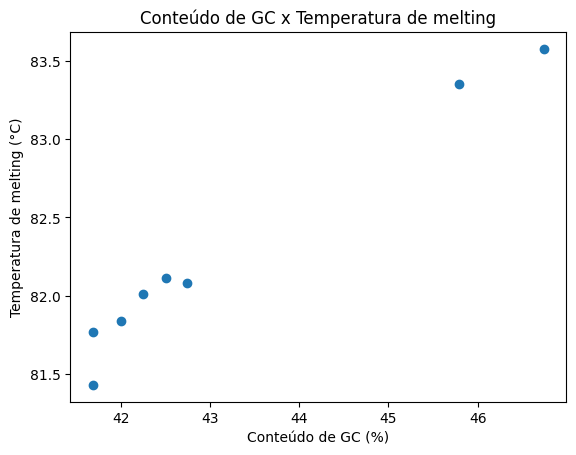

In [ ]:
# Cria o gráfico do tipo scatter (pontos)
plt.scatter(conteudos_GC, temperatura_tm)

# Adiciona um título ao grafico
plt.title('Conteúdo de GC x Temperatura de melting')

# Adiciona rotulos a X e Y
plt.xlabel('Conteúdo de GC (%)')
plt.ylabel('Temperatura de melting (°C)')

# Exibe o gráfico
plt.show()